<a href="https://colab.research.google.com/github/mpartain1/CodingDojoAssignments/blob/main/BeltExam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv('/content/option_A_clustering_df - option_A_clustering_df.csv')

# Data Cleaning

In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

We can see that data types make sense, and there are no NA values in any of the columns.  Now we check to see if there are inconsistencies in particular categories using histograms.

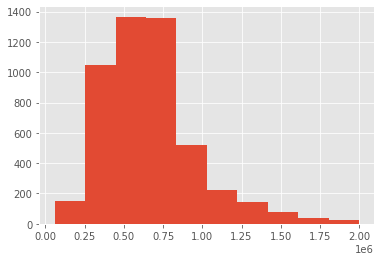

In [5]:
plt.style.use('ggplot')
df['SalePrice'].hist()

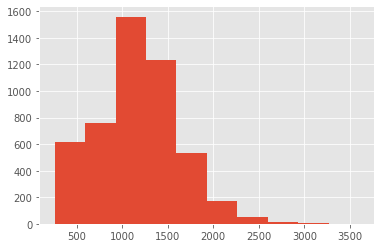

In [6]:
plt.style.use('ggplot')
df['SqFt1stFloor'].hist()

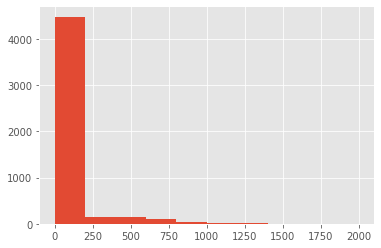

In [7]:
plt.style.use('ggplot')
df['SqFtHalfFloor'].hist()

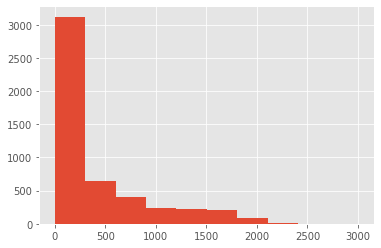

In [8]:
plt.style.use('ggplot')
df['SqFt2ndFloor'].hist()

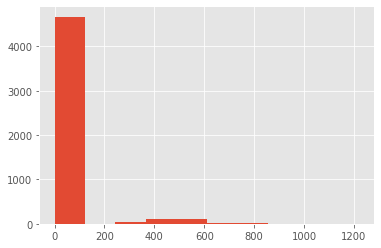

In [9]:
plt.style.use('ggplot')
df['SqFtUpperFloor'].hist()

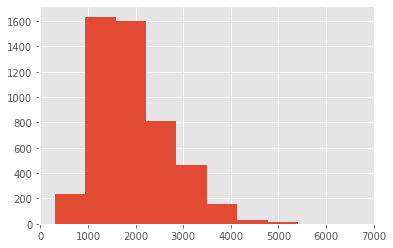

In [10]:
plt.style.use('ggplot')
df['SqFtTotLiving'].hist()

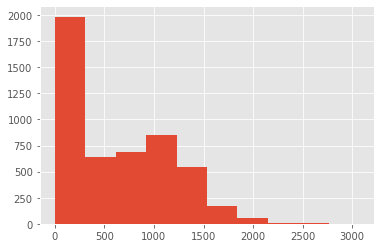

In [11]:
plt.style.use('ggplot')
df['SqFtTotBasement'].hist()

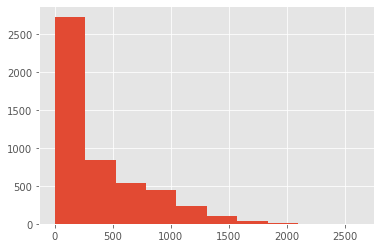

In [12]:
plt.style.use('ggplot')
df['SqFtFinBasement'].hist()

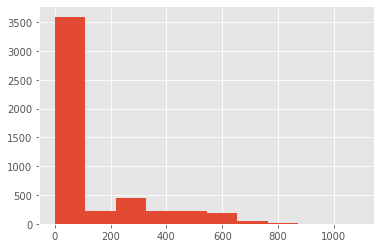

In [13]:
plt.style.use('ggplot')
df['SqFtGarageBasement'].hist()

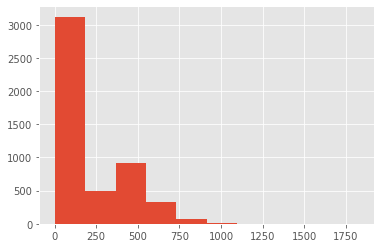

In [14]:
plt.style.use('ggplot')
df['SqFtGarageAttached'].hist()

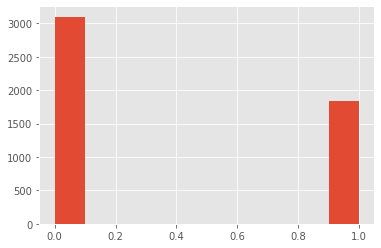

In [15]:
plt.style.use('ggplot')
df['DaylightBasement'].hist()

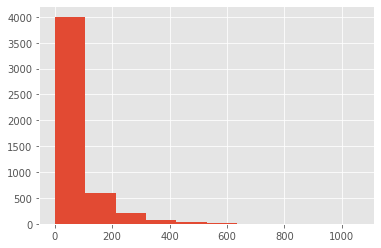

In [16]:
plt.style.use('ggplot')
df['SqFtOpenPorch'].hist()

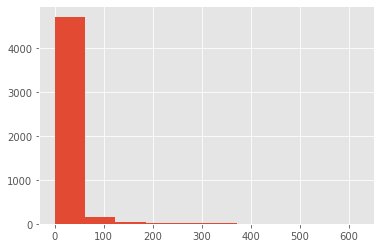

In [17]:
plt.style.use('ggplot')
df['SqFtEnclosedPorch'].hist()

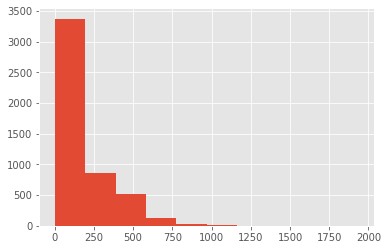

In [18]:
plt.style.use('ggplot')
df['SqFtDeck'].hist()

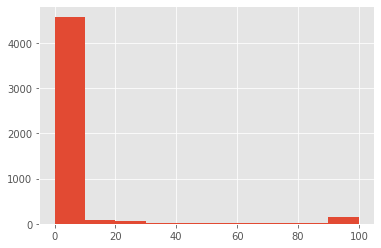

In [19]:
plt.style.use('ggplot')
df['BrickStone'].hist()

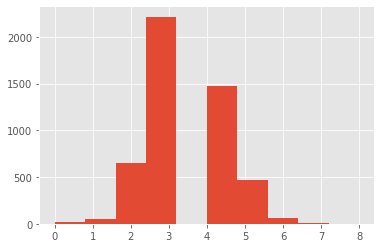

In [20]:
plt.style.use('ggplot')
df['Bedrooms'].hist()

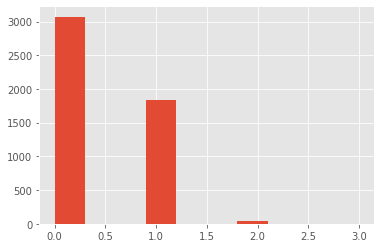

In [21]:
plt.style.use('ggplot')
df['BathHalfCount'].hist()

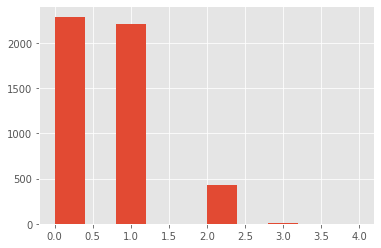

In [22]:
plt.style.use('ggplot')
df['Bath3qtrCount'].hist()

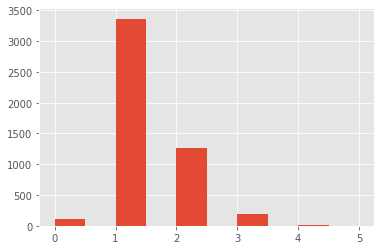

In [23]:
plt.style.use('ggplot')
df['BathFullCount'].hist()

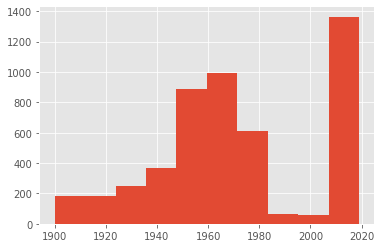

In [24]:
plt.style.use('ggplot')
df['YrBuilt'].hist()

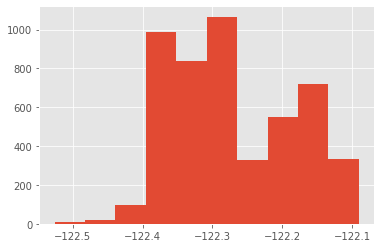

In [25]:
plt.style.use('ggplot')
df['Longitude'].hist()

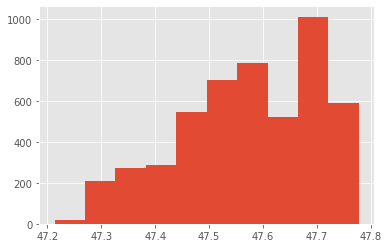

In [26]:
plt.style.use('ggplot')
df['Latitude'].hist()

From the above graphs, we can see that there aren't any column values too far off the main groups, so row deletion or mean imputation are not necessary here.  Additionally, there are no categorical columns that might have inconsitent values to check for.  There are also no meaningless columns to drop.  In the final step of the data cleaning process, we will check for and remove duplicates.

In [27]:
df.drop_duplicates(inplace=True)

# Clustering

We will begin by preparing our data for clustering and fitting our KMeans model on the data.

In [28]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

Below we use an elbow plot and silhouette score to find the optimal number of clusters.

Text(0, 0.5, 'inertia')

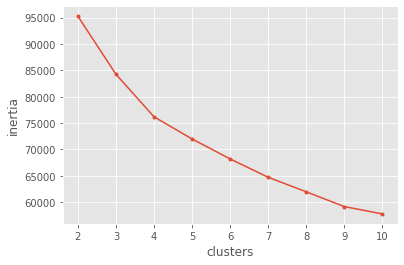

In [29]:
inertias = []
for k in range (2, 11):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(scaled_df)
        inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

From this graph, we can see that as the number of clusters increases, the inertia decreases, which is expected.  There is a small elbow at 4 and 9 clusters, but nothing too notable. We must further evaluate the optimal number of clusters using a silhouette score graph.

Text(0, 0.5, 'Silhouette Score')

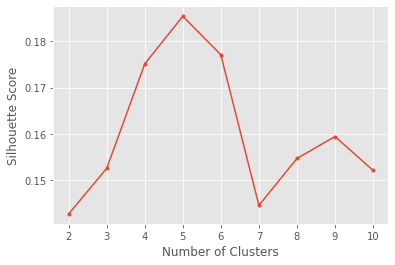

In [30]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

From this graph, we can see that the silhouette score increases from 2 to 5 clusters, decreases dramatically for 6 clusters, maximizes at 7 clusters, and decreases from there.

In summary, from the above graphs, we can see that 7 clusters is optimal since its intertia is relatively low, and its silhouette score is highest.  Increasing the number of clusters beyond 7 dramatically reduces the silhouette score.  Furthermore, 5 clusters has a similar silhouette score, but its inertia is higher than 7 clusters.  7 clusters is our best choice, 5 clusters is our second best choice.

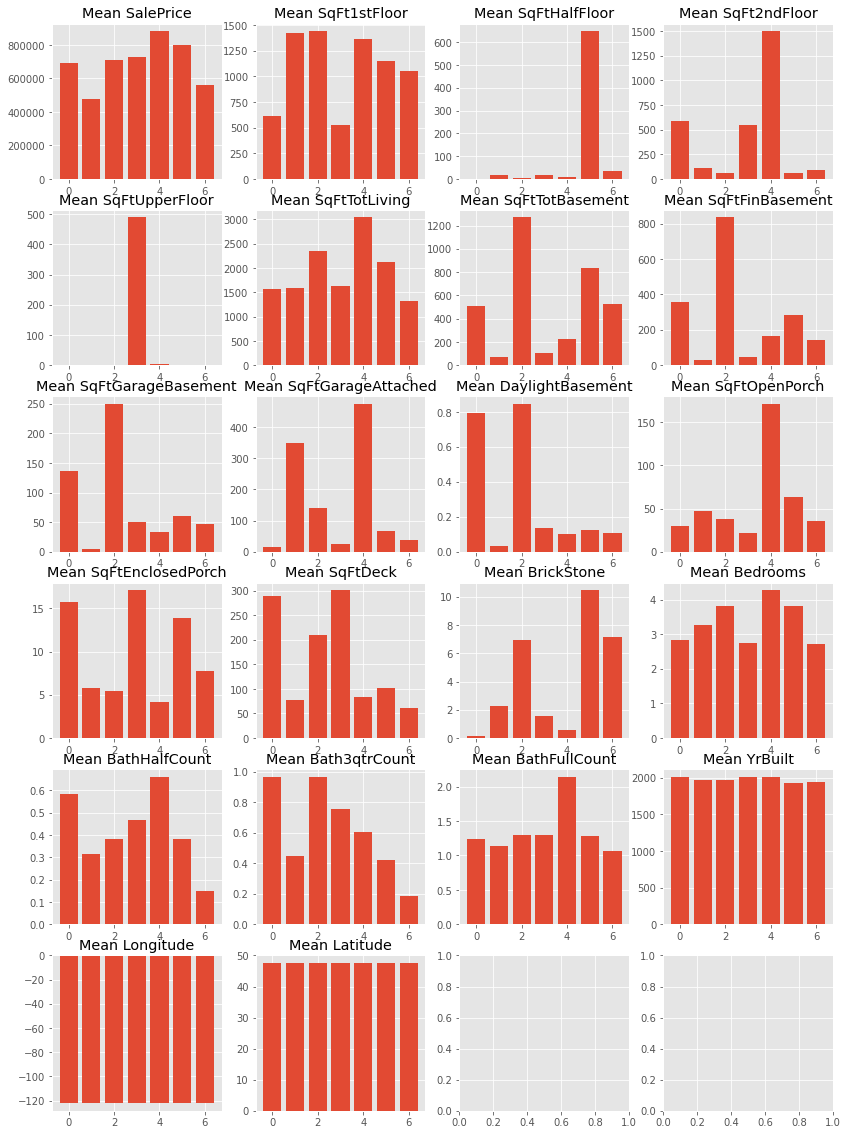

In [36]:
# Refit KMeans with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
cluster_groups = df.groupby('cluster', as_index=False).mean()
# Visualize means 
fig, axes = plt.subplots(6,4, figsize = (14, 20))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

The prompt asked for two report quality visualizations showing important differences between clusters.  In order to find the two most consequential differences, I actually created 22 visualizations, or one for each variable.  We will discuss 2 of them specifically.  The first vizualization we will look at is the Mean Square Foot Open Porch Visualization.  As we can see, cluster 4 has a mean number of square footage that is at least double that of each of the other clusters.  This implies that the clusters were determined in part based on this important column.  In addition, most of the other clusters are around or below 50 square feet, but none are too close to zero square feet.  The second visualization of note is the Mean Bath Full Count visualization.  This graph shows us that cluster 4 has a mean full bath count that is significantly higher than all the others at around 2 full baths.  The others seem to hover around 1.25.  From these two graphs, we can conclude that cluster 4 generally pertains to larger and presumably more expensive homes.

We will now load the modelling data.

In [37]:
df2 = pd.read_csv('/content/option_A_modeling_df - option_A_modeling_df.csv')

In [58]:
y = df2['SalePrice']
X = df2.drop(columns=['SalePrice'])

In [48]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df2 = scaler.fit_transform(X)
pca = PCA()
pca.fit(scaled_df2)

PCA()

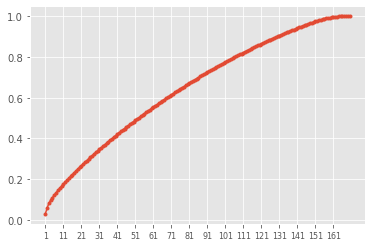

In [55]:
plt.plot(range(1, 171), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,171, 10), fontsize=8);

Text(0, 0.5, 'Proportion of Explained Variance')

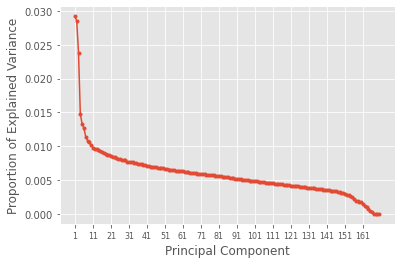

In [56]:
plt.plot(range(1, 171), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 171, 10), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

From here we can see that a good number of principal components is 11 in terms of not sacrificing too much variance.

In [61]:
transformer = make_pipeline(StandardScaler(), PCA(n_components=11))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
transformer.fit(X_train)
X_train_trans = transformer.transform(X_train)
X_test_trans = transformer.transform(X_test)

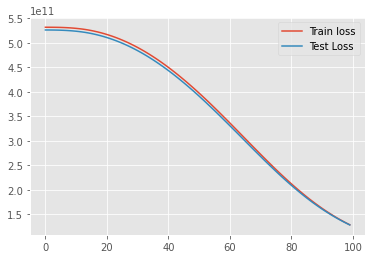

In [72]:
input_dim = X_train_trans.shape[1]
 
model = Sequential()
 
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Step 2: Compile
model.compile(loss='mse',
              optimizer='adam',
              metrics=[metrics.MeanAbsoluteError(),
              metrics.RootMeanSquaredError()])


# Step 3: Fit our model
history = model.fit(X_train_trans, y_train,
                        validation_data = (X_test_trans, y_test),
                        epochs=100,
                        verbose=0)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();


In [70]:
y_pred = model.predict(X_test_trans)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 721898.945123266
final MAE: 659407.7450793309
final R2: -4.962959076332964


We now update our model by adding another layer.  The reason for this adjustment is to increase complexity of our model to account for not enough loss above.  If possible, we would prepfer a steeper decline on the loss graph.

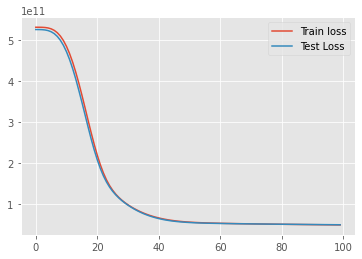

In [74]:
input_dim = X_train_trans.shape[1]
 
model = Sequential()
 
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

# Step 2: Compile
model.compile(loss='mse',
              optimizer='adam',
              metrics=[metrics.MeanAbsoluteError(),
              metrics.RootMeanSquaredError()])


# Step 3: Fit our model
history = model.fit(X_train_trans, y_train,
                        validation_data = (X_test_trans, y_test),
                        epochs=100,
                        verbose=0)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [75]:
y_pred = model.predict(X_test_trans)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 224213.99876720898
final MAE: 159259.43278087044
final R2: 0.42477935751585194


The RMSE and MAE are better than for our first model, which is a sign of improvement. The added layer also causes the loss to decrease faster which was our goal.


In case there is overfitting, let us apply a regularization technique that will account for this possibility.  We will use the dropout function.

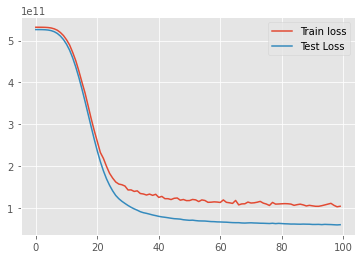

In [76]:
input_dim = X_train_trans.shape[1]
 
model = Sequential()
 
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(7, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='linear'))

# Step 2: Compile
model.compile(loss='mse',
              optimizer='adam',
              metrics=[metrics.MeanAbsoluteError(),
              metrics.RootMeanSquaredError()])


# Step 3: Fit our model
history = model.fit(X_train_trans, y_train,
                        validation_data = (X_test_trans, y_test),
                        epochs=100,
                        verbose=0)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [77]:
y_pred = model.predict(X_test_trans)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

final RMSE: 245726.69428170164
final MAE: 173549.5686487854
final R2: 0.30910238926164546


We can see that the dropout layers were not all that helpful as it increased the loss on the training data and did not change the loss on the testing data all that much.

We can conclude that the most helpful model of the three is the second model above.  This is because it has a sharper decline in its loss metric when compared to the first model. In addition, its training and testing loss values are overall smaller than the third model.  Also of note, both the first and third model metrics, particularly RMSE and MAE, are higher than that of the second model, thus indicating that the second model is most optimal.  The second model also has a larger R2 value than the third, indicating that it explains more of the variance observed.

In conclusion, based on these metrics, our model will solve the business problem in a sufficient way.  Sales prices will be predicted with a model that explains 42% of the variance, which is higher than model 3.  Our model will utilize 4 layers with progressively less nodes per layer to figure out based on the different factors such as number of bedrooms, number of bathrooms, etc. how much a particular home is sold for. 